This notebook is our introduction to the concept of [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) in 18.06.  Unlike the textbook, however, I'm going to approach the subject a little differently.  I'm going to work *backwards*: starting at what we would *like* to obtain (**make matrices act like scalars**) and go backwards to the methods and conditions to achieve this.

# Scalars are easy, matrices are hard?

Multiplying a vector by a scalar is easy to understand.  For example, if we multiply a vector $x$ by 0.1 over and over again, we get

$$
0.1^n x \to 0
$$

The direction remains the same, but the magnitude decreases by a factor of 10 each time we multiply, asympotically going to zero.

In contrast, multiplying by a *matrix* is a complicated operation.  Easy for a computer, but hard to *understand* if the matrix is big.  If we multiply a vector $x$ by a matrix $A$ over and over, what happens?

$$
A^n x \to ???
$$

Hard to say at a glance, even if I tell you what $A$ is!

Also, lots of things that are easy with scalars $\lambda$ are hard with matrices $A$. For example:

* **Solving** $\lambda x = b$ is easy: $x = \lambda^{-1} b$ (unless $\lambda=0$).  Solving $Ax=b$ is hard; even if $A$ is nonsingular, $A^{-1} b$ is a lot of work to compute.  Inverting matrices is harder than inverting numbers!

* It's easy to tell **whether** $\lambda x = b$ **has a solution**, and whether it is unique: unique solutions if $\alpha \ne 0$, and otherwise if $\lambda=0$ then there are (infinitely many) solutions only for $b=0$.  For $Ax=b$, we need to work out the rank, nullspace, etcetera.

* Repeated multiplication (**powers**): $\lambda^n$ is easy to compute and understand, $A^n$ is hard.

  - $\lambda^n$ will go to zero as $n \to \infty$ if $|\lambda| < 1$, and will blow up if $|\lambda| > 1$.  What about $A^n$?

* Solving the **ordinary differential equation (ODE)** $\frac{dx}{dt} = \lambda x$ is easy: $x(t) = e^{\lambda t} x(0)$.  Solving the *system* of ODEs $\frac{dx}{dt} = A x$ seems hard.  Maybe $x(t) = e^{A t} x(0)$, but what the heck does $e^A$ even mean?

  - The solutions $\sim e^{\lambda t}$ will go to zero as $t \to \infty$ for real $\lambda < 0$ and will blow up for $\lambda > 0$.  What about for $A$?

* ...many other tasks...

# Eigenvectors: Where matrices act like scalars

Suppose that we could find *some* $x \ne 0$ for which

$$
\boxed{Ax = \lambda x}
$$

for some scalar λ.   **For *that* x, the matrix A would act like a scalar λ.**  Multipling, dividing, etcetera by $A$ would be easy for that vector (and multiples thereof)!

We call such an $x$ an **eigenvector** of $A$, and $\lambda$ the corresponding **eigenvalue**.  Of course, $\alpha x$ for any scalar $\alpha$ is an eigenvector of the same $\lambda$, but this is a *subspace*, and we only need to find a *basis* vector $x$.

But why should such magical solutions even exist?

# Diagonal matrices are almost as easy as scalars

If we have an $m \times m$ [diagonal matrix](https://en.wikipedia.org/wiki/Diagonal_matrix) $Λ$, it is almost as easy to work with as a scalar:

$$
Λ = \begin{pmatrix} \lambda_1 & 0 & 0 & 0 \\
                    0 & \lambda_2 & 0 & 0 \\
                    0 & 0 & \ddots & 0 \\
                    0 & 0 & 0 & \lambda_m \end{pmatrix}
$$

In fact, it is clear that the diagonal elements $\lambda_k$ are exactly eigenvalues, and the corresponding eigenvectors are the [standard basis vectors](https://en.wikipedia.org/wiki/Standard_basis): the columns of the $m \times m$ identity matrix $I$.

For example, consider the $4\times4$ matrix with $\lambda_1 = 0.1$, $\lambda_2 = 0.2$, $\lambda_3 = 0.3$, and $\lambda_4$ = 0.4:

In [1]:
Λ = diagm([0.1, 0.2, 0.4, 0.5])

4×4 Array{Float64,2}:
 0.1  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.4  0.0
 0.0  0.0  0.0  0.5

This has four eigenvectors
$$
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, 
\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, 
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, 
\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}, 
$$
(along with any multiples of these vectors: again, we only need a basis for the eigenvectors).

In [2]:
Λ * [10
     0
     0
     0]

4-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0

In [3]:
Λ * [0
     10
     0
     0]

4-element Array{Float64,1}:
 0.0
 2.0
 0.0
 0.0

If we multiply a vector $x \in \mathbb{R}^4$ by $Λ$, then it multiplies the first component by 0.1, the second by 0.2, etcetera:

In [4]:
x = [1,1,1,1]
Λ * x

4-element Array{Float64,1}:
 0.1
 0.2
 0.4
 0.5

Multiplying 10 times by $Λ$ just multiplies the first component by $0.1^{10}$, the second by $0.2^{10}$, and so on:

In [5]:
Λ^10 * x

4-element Array{Float64,1}:
 1.0e-10    
 1.024e-7   
 0.000104858
 0.000976563

We can think about this as writing $x$ in the *basis* of the eigenvectors, and then for *each* eigenvector, the matrix Λ acts like a number λ:

$$
\Lambda^n x = \lambda_1^n \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} +
\lambda_2^n \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} +
\lambda_3^n \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} +
\lambda_4^n \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \; .
$$

Since each $|\lambda_k| < 1$, it is clear that $\Lambda^n x \to 0$ as $n \to \infty$.

Equivalently, the matrix $$ Λ^n = \begin{pmatrix} \lambda_1^n & & & \\ & \lambda_2^n & & \\ & & \lambda_3^n & \\ & & & \lambda_4^n \end{pmatrix}$$ itself must go to zero as $n$ increases:

In [6]:
Λ^100

4×4 Array{Float64,2}:
 1.0e-100  0.0          0.0          0.0        
 0.0       1.26765e-70  0.0          0.0        
 0.0       0.0          1.60694e-40  0.0        
 0.0       0.0          0.0          7.88861e-31

Morever, if we multiply $Λ$ by a vector $x$ repeatedly, it will quickly become **nearly parallel** to the last eigenvector $(0,0,0,1)$, since the $0.5^n$ term **decays the most slowly**.  It is expecially easy to see this if we look at the **unit vector** (length = 1)

$$
\frac{Λ^n x}{\Vert Λ^n x \Vert}
$$

In [7]:
using Interact
@manipulate for n = slider(0:100, value=0)
    y = Λ^n * x
    y / norm(y)
end

Interact.Slider{Int64}(Signal{Int64}(0, nactions=1),"",0,0:100,"horizontal",true,"d",true)

4-element Array{Float64,1}:
 0.5
 0.5
 0.5
 0.5

A diagonal matrix is **nonsingular** if the **diagonal entries are nonzero**, and the inverse $Λ^{-1}$ is found by just inverting the diagonal entries:

In [8]:
inv(Λ)

4×4 Array{Float64,2}:
 10.0  0.0  0.0  0.0
  0.0  5.0  0.0  0.0
  0.0  0.0  2.5  0.0
  0.0  0.0  0.0  2.0

**If all matrices were diagonal**, linear algebra would be a lot easier!

# Diagonal + Change of Basis is Almost as Easy

Suppose we have an invertible $m \times m$ matrix $X$.   Going from $x$ to $Xc = x$, or $c = X^{-1}x$, is just a **change of basis**: we are writing $x$ in the basis of the **columns of X**, and $y$ are the coefficients.

If $X = \begin{pmatrix} x_1 & x_2 & \cdots & x_m \end{pmatrix}$, where the $x_k$ are the columns, then $x=Xc$ is with $c = (c_1,c_2,\ldots,c_m)$ is equivalent to:

$$
x = Xc = c_1 x_1 + c_2 x_2 + \cdots c_m x_m \; .
$$

Consider the matrix $A = X Λ X^{-1}$, where $Λ$ is diagonal as above.  What does $Ax$ mean?  If we write:

$$
Ax = X \underbrace{ Λ \underbrace{X^{-1} x}_c }_{Λc}
$$

we see that $Ax$ is equivalent to:

1. Solve $Xc=x$ to express $x$ in the $X$ basis with coefficients $c$.

2. Multiply each component of $c$ by the corresponding diagonal entry of $Λ$ to get $Λc$.

3. Multiply $Λc$ by $X$ to get $X(Λc)$ in the original ($x$) coordinate system (basis).

That is $A$ is just a **diagonal matrix in a different basis**: we change basis, multiply the components by scalars, then change back the basis.

Hence

$$
Ax = AXc = X Λ c = \lambda_1 c_1 x_1 + \lambda_2 c_2 x_2 + \cdots \lambda_m c_m x_m \; .
$$

Another way of putting this is that the **columns of X are eigenvectors**:

$$
A x_k = \lambda_k x_k
$$

for $k = 1, \ldots, m$!

That is, $A$ just **multiplies each eigenvector $x_k$ by the corresponding eigenvalue $\lambda_k$**.  Again, **for each eigenvector, the matrix A just acts like a number λ**.

For example, with our $4 \times 4$ matrix $Λ$ from above, let's construct:

In [9]:
X = [ 1 0 1  0
      2 1 0  1
      0 1 1  0
      1 0 0 -1]
rank(X)

4

In [10]:
A = X * Λ / X

4×4 Array{Float64,2}:
  0.325  -0.075   0.075  -0.075
  0.025   0.225  -0.025  -0.275
  0.15   -0.05    0.25   -0.05 
 -0.1    -0.1     0.1     0.4  

If we didn't know where it came from, this matrix $A$ wouldn't look like anything special.

But multiplying $A$ by **any column of X** just multiplies by a number.  For example, multipling $A$ by the *first column* of X just multiplies by $0.1$ (the first diagonal element of $Λ$):

In [11]:
A * X[:, 1]

4-element Array{Float64,1}:
 0.1
 0.2
 0.0
 0.1

Multiplying $A$ by the second column just multiplies it by 0.2, and so on:

In [12]:
A * X[:, 2]

4-element Array{Float64,1}:
 0.0
 0.2
 0.2
 0.0

**For these special vectors** (the columns of $X$), which we will call **eigenvectors**, the **matrix A acts just like a scalar** (which we call the **eigenvalue**).

If we solve $Xc = x$ to write

$$
x = c_1 x_1 + c_2 x_2 + c_3 x_3 + c_4 x_4
$$

then $Ax$ is just

$$
x = 0.1 c_1 x_1 + 0.2 c_2 x_2 + 0.4 c_3 x_3 + 0.5 c_4 x_4
$$

It is clear, therefore, that multipling *any* vector $x$ repeatedly by $A$ will make it go to zero (the length will shrink exponentially fast).  Let's try our vector $x = (1,1,1,1)$ from above:

In [13]:
x

4-element Array{Int64,1}:
 1
 1
 1
 1

If we solve $Xc=x$ to express it in the $X$ basis, then we see that it has components from every column of $X$:

In [14]:
c = X\x

4-element Array{Float64,1}:
  0.5
  0.5
  0.5
 -0.5

If we multiply $A$ times $x$ many times, it must **go to zero** for the same reason as $Λ^n x$ above:

In [15]:
A^100 * x

4-element Array{Float64,1}:
  8.03468e-41
 -3.9443e-31 
  8.03468e-41
  3.9443e-31 

In [16]:
(A^100*x) / norm(A^100*x)

4-element Array{Float64,1}:
  1.4404e-10
 -0.707107  
  1.4404e-10
  0.707107  

Since this must happen for *any* $x$, $A^n$ itself must go to zero:

In [17]:
A^100

4×4 Array{Float64,2}:
  1.2052e-40   -4.01734e-41   4.01734e-41  -4.01736e-41
  1.97215e-31   1.97215e-31  -1.97215e-31  -5.91646e-31
  1.2052e-40   -4.01734e-41   4.01734e-41  -4.01735e-41
 -1.97215e-31  -1.97215e-31   1.97215e-31   5.91646e-31

Another way to see this is to realize that:

$$
A^n = \underbrace{AAA \cdots  AAA}_{n\mbox{ times}} = XΛX^{-1}XΛX^{-1}XΛX^{-1}\cdots XΛX^{-1}XΛX^{-1}XΛX^{-1} = XΛ^n X^{-1}
$$

which goes to zero because $Λ^n$ goes to zero.

The formula means that

$$
A^n x = XΛ^n \underbrace{X^{-1}x}_c = \lambda_1^n c_1 x_1 + \lambda_2^n c_2 x_2 + \cdots + \lambda_m^n c_m x_m
$$

i.e. **multiplying repeatedly by A just multiplies each eigenvector repeatedly by $\lambda$.**

Finally, since $\Lambda$ is invertible, $A$ must be invertible too: $$A^{-1} x = c_1 x_1 / \lambda_1 + c_2 x_2 / \lambda_2 + \cdots $$
i.e. $A^{-1} x$ just divides each eigenvector component by the eigenvalue.

In [18]:
inv(A)

4×4 Array{Float64,2}:
  4.375  1.875  -1.875  1.875
  1.75   6.75   -1.75   4.75 
 -1.875  0.625   4.375  0.625
  2.0    2.0    -2.0    4.0  

Equivalently $A^{-1} = X \Lambda^{-1} X^{-1}$:

In [19]:
X * inv(Λ) * inv(X)

4×4 Array{Float64,2}:
  4.375  1.875  -1.875  1.875
  1.75   6.75   -1.75   4.75 
 -1.875  0.625   4.375  0.625
  2.0    2.0    -2.0    4.0  

Notice that the entries are not too big, which is not surprising since the $1/\lambda_1 = 10$ is the biggest entry in $\Lambda^{-1}$.

# Eigenvectors of an arbitrary matrix

By constructing $A = X \Lambda X^{-1}$ above, we got rather arbitrary-looking $m\times m$ matrices $A$ with $m$ linearly eigenvectors.   This was great, because then the eigenvectors formed a basis of $\mathbb{R}^m$:  we could **write any vector in the basis of eigenvectors**, and for each eigenvector component the **matrix acts like a scalar**.

Can we do the reverse?  For *any* matrix $A$, can we find a basis $X$ of eigenvectors, such that $A = X \Lambda X^{-1}$ in that basis?  (This is called **diagonalizing** the matrix: finding a basis in which it is diagonal.)  *If* we can find the eigenvectors for an arbitrary $A$, they would tell us a lot — matrices are hard to understand, but scalars are easy, and the eigenvalues tell us what scalars $A$ acts like.

It turns out that **this this is almost always possible**.  For *almost* any $m \times m$ matrix $A$ we (or rather, the computer) can find a basis of exactly $m$ eigenvectors $x_k$ and eigenvalues $\lambda_k$.  Julia will do this for us, with the `eig(A)` function:

In [20]:
eigenvalues, eigenvectors = eig(A)

([0.1,0.2,0.4,0.5],
[0.408248 -7.70519e-16 0.707107 2.71948e-16; 0.816497 -0.707107 0.0 -0.707107; 8.04912e-16 -0.707107 0.707107 1.22377e-15; 0.408248 -4.98571e-16 -3.31016e-16 0.707107])

It returns exactly the same eigenvalues as above:

In [21]:
eigenvalues

4-element Array{Float64,1}:
 0.1
 0.2
 0.4
 0.5

It also returns a matrix whose columns are eigenvectors.  These look a little different than $X$ from above, though:

In [22]:
eigenvectors

4×4 Array{Float64,2}:
 0.408248     -7.70519e-16   0.707107      2.71948e-16
 0.816497     -0.707107      0.0          -0.707107   
 8.04912e-16  -0.707107      0.707107      1.22377e-15
 0.408248     -4.98571e-16  -3.31016e-16   0.707107   

But they are just scalar multiples of the columns of $X$, as we can easily see by multiplying by $X^{-1}$ (writing these eigenvectors in the $X$ basis:

In [23]:
round.(X \ eigenvectors, 5) # X⁻¹ * eigenvectors, rounded to 5 digits

4×4 Array{Float64,2}:
  0.40825  -0.0       0.0      -0.0    
  0.0      -0.70711  -0.0       0.0    
  0.0      -0.0       0.70711   0.0    
 -0.0      -0.0       0.0      -0.70711

There are **extremely rare exceptions** called [defective matrices](https://en.wikipedia.org/wiki/Defective_matrix) in which you get **too few** eigenvectors to form a basis for the whole $\mathbb{R}^m$ space. We'll come back to those later, but for now I want to focus on the typical cases of [diagonalizable matrices](https://en.wikipedia.org/wiki/Diagonalizable_matrix) where we *do* have $m$ eigenvectors.

Given only $A$, how do we find the eigenvectors and eigenvalues?  How do we know that such solutions exist in the first place, and how many such solutions are there?

Let's go back to the beginning.  We are trying to find $x\ne 0$ satisfying $Ax = \lambda x$.  Equivalently, we want:

$$
Ax - \lambda x = (A - \lambda I) x = 0
$$

That is, we want the **nullspace** of $A - \lambda I$.   For *most* λ, this nullspace will be just $\{0\}$.   To get a nontrivial nullspace, we want to

* **Find the values of λ such that A-λI is singular.**

These λ are the eigenvalues of $A$.

# The characteristic polynomial

Finding the $\lambda$ such that $A - \lambda I$ is singular can be theoretically expressed in terms of a concept you will have heard of before: a matrix is singular when its [determinant](https://en.wikipedia.org/wiki/Determinant) is zero.  Hence, we want to solve:

$$
p(\lambda) = \det(A - \lambda I) = 0
$$

This function $p(\lambda)$ turns out to be a **polynomial of degree m** for an $m\times m$ matrix $A$, and is called the [characteristic polynomial](https://en.wikipedia.org/wiki/Characteristic_polynomial) of $A$.  Since it is a degree-m polynomial, it will typically have **m roots** (possibly **complex numbers**), the eigenvalues of $A$!

To understand this properly, we need to go back and explain determinants.  All you will have seen determinants of 2×2 and 3×3 matrices before (e.g. in 18.02), but you may not have seen them for general $m\times m$ matrices.

Let's plot $p(\lambda)$ for our 4×4 matrix $A = X\Lambda X^{-1}$ from above, using Julia's built-in `det` function:

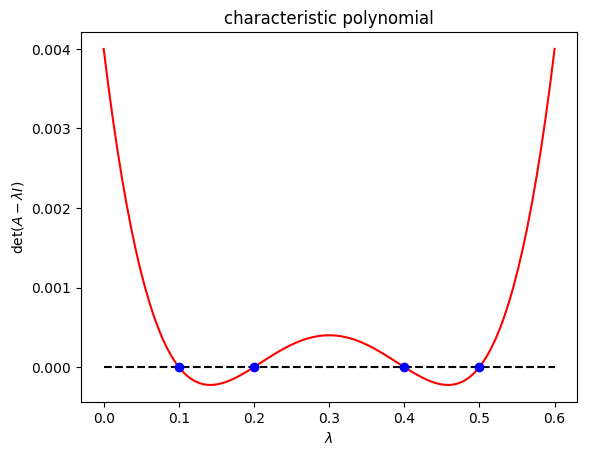

PyObject <matplotlib.text.Text object at 0x31f97b090>

In [24]:
using PyPlot
λ = linspace(0,0.6,100)
plot(λ, [det(A - λ*I) for λ in λ], "r-")
plot(λ, 0*λ, "k--")
plot(diag(Λ),diag(Λ)*0, "bo")
xlabel(L"\lambda")
ylabel(L"\det(A - \lambda I)")
title("characteristic polynomial")

This is a quartic curve, and exactly as expected there are roots (dots) at the four eigenvalues 0.1, 0.2, 0.4, and 0.5.